In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sympy as sp


## Punto a

In [2]:
def bilineal_aprox(x, y, p, N):
    sum = 0
    for i in range(N):
        for j in range(N):
            sum += p[i, j]*x**i*y**j
    return sum


In [3]:
def sympy_bilineal_aprox(x, y, N):
    sum = 0
    x = sp.symbols('x')
    y = sp.symbols('y')
    for i in range(N):
        for j in range(N):
            a_s = sp.symbols('a'+str(i)+str(j))
            sum += a_s*x**i*y**j
    return sum


## b)

In [4]:
position = np.zeros((4, 2))
position[0] = [1, 1]
position[1] = [-1, 1]
position[2] = [-1, -1]
position[3] = [1, -1]

a = []
for i in range(4):
    for j in range(2):
        a.append(position[i, j])

print(f'{a}')


[1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0]


In [5]:

sym_bilineal = sympy_bilineal_aprox(1, 1, 2)
print(f'{sym_bilineal}')


a00 + a01*y + a10*x + a11*x*y


## C

In [6]:
P = np.zeros((4, 1))
P[0] = 1
P[1] = 2
P[2] = 0.5
P[3] = 0.3


In [7]:
print(f'{position[0, 0]}')


1.0


In [8]:
def make_square(A):
    return A @ A.T


In [9]:
x = make_square(position)@P
print(f'{x}')


[[ 1. ]
 [ 3.4]
 [-1. ]
 [-3.4]]


## D

In [10]:
def non_square_inverse(A):
    return np.linalg.inv(A.T @ A) @ A.T


In [11]:
test = non_square_inverse(position)@x
print(f'{test}')


[[-1.2]
 [ 2.2]]


## F

In [12]:
Pd = np.zeros((2, 1))
Pd[0] = 0
Pd[1] = 0.5

T_b = x - position@Pd
T_b = np.linalg.norm(T_b)
print(f'T = {T_b}')


T = 4.161730409336962


## G

In [13]:
def rotation_matrix(theta):
    return np.array([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta), np.cos(theta)]])


def vector_rotation(theta, v):
    return rotation_matrix(theta) @ v

def multiple_vector_rotation(theta, v):
    return np.array([vector_rotation(theta, v[i]) for i in range(len(v))])

## I

In [15]:
print(f'{multiple_vector_rotation(np.pi/2, position)}')

[[-1.  1.]
 [-1. -1.]
 [ 1. -1.]
 [ 1.  1.]]


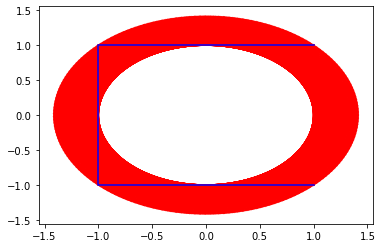

In [18]:
theta = np.linspace(0,2*np.pi,200)
k= np.array([]) 
for var in theta:
    k = np.append(k, np.linalg.norm(make_square(multiple_vector_rotation(var, position))@P))
    plt.plot(multiple_vector_rotation(var, position)[:,0], multiple_vector_rotation(var, position)[:,1], 'r')
plt.plot(position[:,0], position[:,1], 'b')
plt.show()

In [22]:
min(k)-max(k)

-1.7763568394002505e-15